<h1><center><b> Customer Scoring: Your First Machine Learning Project in Python Step-By-Step </b></center></h1>

![lead_scoring.png](https://www.gofcr.com/wp-content/upload/2018/05/yes-no-qualityFB.jpg)

The best way to learn a new concept is to work through it, end-to-end. When you are applying machine learning to your own datasets, you get a better understanding of the key steps that are involved in the successful application of ML to a use case.

A machine learning project has a number of well known steps:


1. Define project objectives.
2. Acquire and explore data.
3. Data preparation.
4. Modelling and evaluation.
5. Implement, document and maintain.







# 1. Define Project Objectives 🎯

Customer Scoring is an approach to find whether a lead will buy our product or not. This method uses personal information of the lead and his activities on the company's website. We try to track the activities of the lead and find whether he in interested in buying our products or not.


# 2. Acquire and Explore Data 🔍

Let us begin by importing some basic and most widely used ML libraries. There are 5 key libraries that you will need to install. 
<span style="color:blue;"> SciPy </span> (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages: 

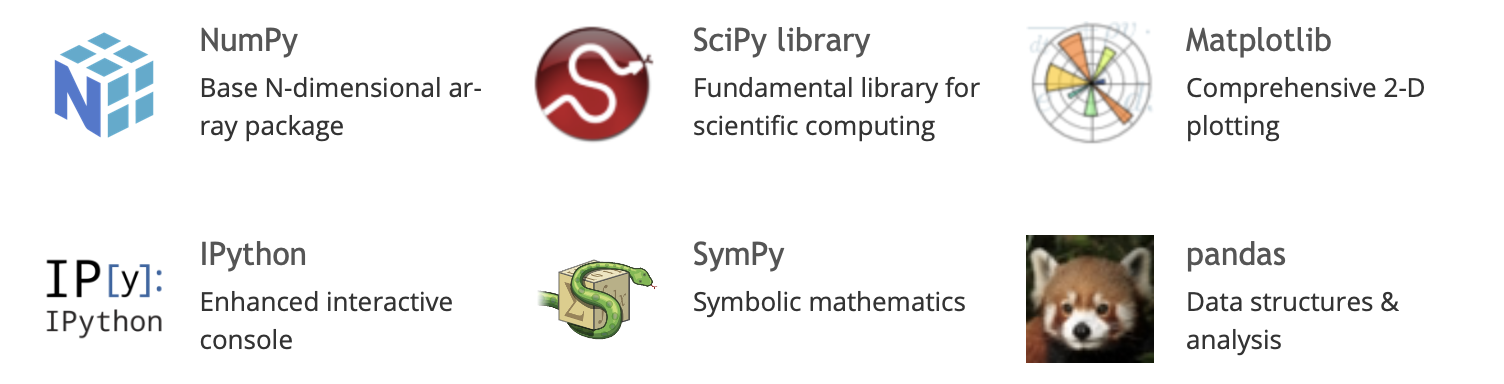

We are going to import scipy, numpy, matplotlib, pandas right now.
We will also import some scikit-learn modules. **Scikit-learn** is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

In [ ]:
import scipy
from scipy import stats, integrate
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.ticker as mtick
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Loading the dataset

data = pd.read_csv("/kaggle/input/dataset/session_dataset_scoring.csv")

In [ ]:
data.shape

At first look, this data has <span style="color:green;"> **20 features** </span>. This data lists the behaviour of over <span style="color:green;">**7000 potential customers** </span>on an automobile company's website. The last column, 'Retail', tells us whether the person ended up buying a vehicle or not. 
The problem statment is derivative from here: we need to predict whether a person browsing the website will actually buy the vehicle or not, based on the behaviour of previous potential customers. Since we have the ground truth available, this becomes a **supervised machine learning problem** And if we look at the target variable 'Retail', we can see that it has only two possible discrete outcomes - Yes or No. So, this is a classification use case, and more precisely, a **binary classification** use case.

Let's have a look at the data.

In [ ]:
data.head() # shows the first 5 rows and all columns of the dataframe

The above sneak peak at the data reveals the features we have. For instance, gender, own_vehicle, homepage, first_enquiry, zone etc. are all categorical variables with two categories each - Yes and No. **Zone** has three categories - North, South, West. 
We have to handle these categorical features (which we will come to in a short while), since machine learning models can only process numeric data.

* customer_code - alphanumeric unique code
* gender - Male, Female
* dealer_search - 0 means no and 1 means yes - whether a person visited dealer page or not
* own_vehicle - yes or no 
* homepage - yes or no - whether a person visited home page or not
* no_of_pages_visited - integer values - total number of pages visited
* first_enquiry - yes or no 
* parts/service - yes or no - whether a person visited parts/service page or not
* p1 - enquiry made for this product? yes or no
* p2 - enquiry made for this product? yes or no
* p3 - enquiry made for this product? yes or no
* p4 - enquiry made for this product? yes or no
* p5 - enquiry made for this product? yes or no
* p6 - enquiry made for this product? yes or no
* zone - North, South, West
* model_page_visited - yes or no - whether a person visited the product page of the model he is interested in or not
* source_of_enquiry - search engine, social networking, etc.
* time_spent_last_1_week - float variable
* total_time_spent - float variable
* Retail - Our target variable


Let us check the type of each column.

In [ ]:
data.dtypes

The variable <span style="color:blue;"> **total_time_spent**</span> is an object type variable which is not correct. It must be converted to a numeric (float) type variable before we can process it any further.

In [ ]:
data.total_time_spent = pd.to_numeric(data.total_time_spent, errors='coerce')

In [ ]:
data.dtypes

Now the **total_time_spent** variable has been converted to float.

In [ ]:
# Checking for null values

data.isnull().sum()

11 NA cells in total_time_spent. This is a very small number and these rows can just be dropped from the dataset.


We mostly have categorical features with varying number of categories.

How do we check the number of categories in a feature when it's not clear from a look at the 'head'?

We can use the following pandas method.

In [ ]:
data['zone'].unique()

In [ ]:
data['source_of_enquiry'].unique()

As we can see, 'zone' has 3 categories and 'source_of_enquiry' has 4 categories.
This will help us get a better picture of our data in an easier way, rather than scanning csv files manually.

We can also get a statistical summary of this data for further understanding.

In [ ]:
data.describe()

Here, we have basic statistical information of the numeric features. Mean value, standard deviation, quartiles etc. On an average, a customer visits the webiste 32 times. And the average time spent by customer on the website in the last week is 64 minutes. 
But most of these parameters cannot be computed for categorical variables.
When we add **include = 'object'** in the **describe** method, we also receive some information about categorical variables. Here!

In [ ]:
data.describe(include='object')

In [ ]:
ax = data['Retail'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Retail - Yes or No')

Natrurally, the number of leads actually turning into customers is lower i.e. the class 'Yes' is smaller than 'No'.

We will now have a look at the categorical variables in our data.

In [ ]:
cat_feats = [x for x in data.columns if data[x].dtype == "object" and x != "customer_code"]
cat_feats

In [ ]:
fig = plt.figure(figsize=(18, 30))

for i, col in enumerate(cat_feats):
    plt.subplot(10, 3, i+1)
    sns.countplot(x=data[col],palette = 'Set2')
    plt.tight_layout()
fig.show()

# 3. Data Preparation 🛠

As we know, our target variable has two classes - Yes and No. But we need to convert this to numeric data for our models to be able to process the data. 
By convention, 'Yes' will be replaced by 1 and 'No' will be replaced by 0.

In [ ]:
data_temp = data.iloc[:,1:]

#transform to binary code
data_temp['Retail'].replace(to_replace='Yes', value=1, inplace=True)
data_temp['Retail'].replace(to_replace='No',  value=0, inplace=True)

We will now convert categorical variables into numeric data by a method called **one-hot encoding.** 

![One-Hot Encoding](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

Here, the first column i.e colour_red can be dropped. Because for instances where both the other colours are 0, it belongs to red automatically, like in the first row. This helps us reduce the number of redundant features which make the model unnecessarily complex.
Programmatically, we do this by adding drop_first variable to the get_dummies fucntion.

In [ ]:
data_dummies = pd.get_dummies(data_temp, drop_first=True)
data_dummies.head()

In [ ]:
data_dummies = data_dummies.dropna()
data_dummies.shape

We will now plot the **correlation matrix** of the data.

**Correlation** is statistical technique which determines how one variables moves/changes in relation with the other variable. It gives us the idea about the degree of the relationship of the two variables. It’s a bi-variate analysis measure which describes the association between different variables. In most of the business, it’s useful to express one subject in terms of its relationship with others.

**Positive Correlation:** Two features (variables) can be positively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) also increases.

![Positive Correlation](https://miro.medium.com/max/1064/1*tESnC588CAVypsg7HudpgA.png)

**Negative Correlation:** Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) decreases.

![Negative Correlation](https://miro.medium.com/max/1152/1*VxbqTp-OjYMpqDI0_taHSA.png)

**No Correlation:** Two features (variables) are not correlated with each other. It means that when the value of one variable increase or decrease then the value of the other variable(s) doesn’t increase or decreases.

![No Correlation](https://miro.medium.com/max/1152/1*g3PZJ1XmAE5ISmwRLrVz7Q.png)

In [ ]:
data_corr = data_dummies.iloc[:,0:]

# plt.figure(figsize=(20,5))
# data_corr.corr()['Retail'].sort_values(ascending = False).plot(kind='bar')
a4_dims = (17, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data_corr.corr(), annot=True, ax=ax)


In case the correlation between two variable is high, we remove one of the variables depending on how important each variable is to the dataset. We don't have such high degree of correlation here.


# 4. Modelling and Evaluation 📉

![](https://miro.medium.com/max/2800/0*Vvv85FQ9KAqfyb54.png)

A big part of machine learning is classification — we want to know what class (a.k.a. group) an observation belongs to. The ability to precisely classify observations is extremely valuable for various business applications like predicting whether a particular user will buy a product or forecasting whether a given loan will default or not. Data science provides a plethora of classification algorithms such as logistic regression, support vector machine, naive Bayes classifier, and decision trees. But near the top of the classifier hierarchy is the random forest classifier.

First, let’s quickly go over **decision trees** as they are the building blocks of the random forest model. Fortunately, they are pretty intuitive.

![](https://miro.medium.com/max/900/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not. So how can we do this?

Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.

The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.

The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly. Victory!

Obviously in real life our data will not be this clean but the logic that a decision tree employs remains the same. At each node, it will ask — *What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?*

# Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

![](https://miro.medium.com/max/900/1*VHDtVaDPNepRglIAv72BFg.jpeg)

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: A large number of relatively uncorrelated models(trees) operating as a committee will outperform any of the individual constituent models

The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

Parameters that we commonly use are :

* **n_estimators** = number of trees in the foreset
* **max_features** = max number of features considered for splitting a node
* **max_depth** = max number of levels in each decision tree
* **min_samples_split** = min number of data points placed in a node before the node is split
* **min_samples_leaf** = min number of data points allowed in a leaf node

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

In [ ]:
X = data_dummies.drop(columns = ['Retail'])
y = data_dummies['Retail']

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
Therefore, we will scale all variables to a range of 0 to 1, using **MinMaxScaler**.
![https://miro.medium.com/max/458/0*Gy668nQfirqf6W4c](http://miro.medium.com/max/458/0*Gy668nQfirqf6W4c)

In [ ]:
# Scaling all the variables to a range of 0 to 1

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X

As you can see above, all variables have been scaled and have taken values from 0 to 1.

We will now split our data into training and testing datasets.
![](https://cs.csub.edu/~clei/teaching/files/DataScience/_CrossValidation/CV_holdout.png)

The objective is to estimate the performance of the machine learning model on new data: **data not used to train the model.**

This is how we expect to use the model in practice. That is, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

In [ ]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

In [ ]:
# Running regression model
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

In [ ]:
prediction_test = model_rf.predict(X_test)

# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[:].plot(kind = 'barh')

**Observations**:
* From random forest algorithm, number of pages visited, time spent in the last week, west zone, source of enquiry and total time spent on the webiste are the most important predictor variables to predict retail.


For a better understanding of the results, we will plot a **confusion matrix**.

A confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [ ]:
cfm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()

sns.heatmap(cfm, annot=True, ax=ax, fmt='g'); # annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix - Test Data');
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()

# 5. Implement, Document and Maintain 🗂

![](https://miro.medium.com/max/638/1*lfsNq-qhWwOo-bzqwh7Igw.jpeg)

Deployment of an ML model simply means the integration of the model into an existing production environment which can take in an input and return an output that can be used in making practical business decisions. 

After testing the model on various datasets and getting a green light to productionise, we do the following:
* Set up batch or API prediction system (depending on the use case)
* Document modelling process for reproducibility 
* Create model monitoring and maintenance plan


There are frameworks like Tensorflow, Pytorch, and Scikit-Learn for training, running and deploying models, programming languages like Python, Java, and Go, and even cloud environments like AWS, GCP, and Azure. 

# Conclusion

We covered the basic steps to approach a machine learning problem. This can serve as a template that can help you get started with your first project but these steps are non-exhaustive; there are other data preparation and result improvement tasks which one can learn as they move further from the basics.

<h3> What can you do next? </h3>

* **Learn Machine Learning.** <br>
Andrew Ng's [Machine Learning course](https://www.coursera.org/learn/machine-learning?utm_source=gg&utm_medium=sem&utm_campaign=94-BrandedSearch-IN&utm_content=94-BrandedSearch-IN&campaignid=1776545273&adgroupid=69298819109&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=e&network=g&devicemodel=&adpostion=&creativeid=346568280203&hide_mobile_promo&gclid=EAIaIQobChMIo_Pnx5nr7wIVwnwrCh2tNwE4EAAYASAAEgJGU_D_BwE) offered by Standford University (available on Cousera) and [Machine Learning A-Z](https://www.udemy.com/course/machinelearning/) (available on Udemy) are great places to get started. You will get a broad introduction to machine learning, datamining, and statistical pattern recognition.
<br>

* **Pick up a programming language.** <br>
While there are other languages you can use for Machine Learning like R, Scala, etc. Python is currently the most popular language for ML. In fact, there are many Python libraries that are specifically useful for Artificial Intelligence and Machine Learning such as Keras, TensorFlow, Scikit-learn, etc. 
You can explore the [Python Bootcamp](https://www.udemy.com/course/complete-python-bootcamp/) course where you learn the basics and go all the way to creating your own applications.
<br>

* **Build porjects.** <br>
The best way to learn machine learning is by designing and completing small projects. Few data resources for starting your own project are - Kaggle, Data.gov, Google Public Datasets, UCI Machine Learning Repository.
You can check [this article](http://www.intellspot.com/data-science-project-ideas/) for some project ideas to get started with.
<br>

* **Ask questions!** <br>
This will be the most important step of your learning process and this must never stop. Take advantage of online communities, write to people and reach out for help and never stop learning!

![](https://i.ytimg.com/vi/ObBbF96rjmo/maxresdefault.jpg)